In [1]:
## Import all diferent libraries
import os, sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import numpy as np
import pandas as pd
import glob
import yaml
import pprint
from datetime import datetime
from scipy.stats import ttest_ind
import seaborn as sns
from matplotlib import pyplot as plt
import re


In [5]:

applied_current_ma_vec = [
    -0.400,
    -0.400,
    -0.400
]

is_cathode_vec = [
    1,
    0,
    1
]

In [14]:
##gets access to file path and gets data
paths = yaml.load(open('paths.yaml', 'r'), Loader=yaml.FullLoader)

DATA_FOLDER = paths['data'] + '2021-08-post-mortem-biologic-pc/'
FILE_GROUP_REGEX_LIST = ['*coin*cell2*hppc*.mpt*']
## sorts every file that has coin and hppc in the folder. datafolder is a path to the folder 
file_paths = [sorted(glob.glob(f'{DATA_FOLDER}{f}')) for f in FILE_GROUP_REGEX_LIST]

file_paths

[['/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210819_coin_nmc111_cell2_hppc_CA2.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210822_coin_nmc111_cell2_hppc_2_CA2.mpt']]

In [40]:

applied_current_ma_vec = [
    -0.400,
    -0.400,
    -0.400
]

is_cathode_vec = [
    1,
    0,
    1
]

name_vec = [
    'NMC111',
    'Graphite',
    'LFP'
]


In [15]:
## now my idea is to make a loop that goes through every path and gets all the dataframes to print the graphs
## problem- not all files have same number of rows to skip. Seems to be solved with few if statements for now

In [16]:
def VoltageCurrent(df1, file2):
    cycles_num=np.unique(df1['cycle number'])
    Time=[]
    Voltage=[]
    Current=[]
    for f in cycles_num:
        plt.figure()
        i=np.where(df1['cycle number']==f)
        plt1 =plt.subplot()
        plt2=plt1.twinx()
        Time.append(df1['time/s'].iloc[i]/60)
        Voltage.append(df1['Ecell/V'].iloc[i])
        Current.append(df1['I/mA'].iloc[i])
        plt1.plot(Time[0],Voltage[0], color= 'k')
        plt1.set_xlabel("Time(min)")
        plt1.set_ylabel("Voltage (V)")
        plt2.set_ylabel("Current (mA)")
        plt.title(file2)
        plt2.plot(Time[0],Current[0],color= 'r', ls=':')
        Time.clear()
        Voltage.clear()
        Current.clear()

In [17]:
def Resistance(df1):
    cycles_num=np.unique(df1['cycle number'])
    Time=[]
    Voltage=[]
    Current=[]
    #Resistance=[]
    for a in cycles_num:
        plt.figure()
        i=np.where(df1['cycle number']==a)
        Time.append(abs(df1['time/s'].iloc[i]/60))
        Voltage.append(df1['Ecell/V'].iloc[i])
        Current.append(df1['I/mA'].iloc[i])
        #for k in Current:
         #   if Current[0][k] !=0:
         #       Resistance.append(1000*Voltage[0][k]/Current[0][k])
         #   else:
         #       Resistance.append(0)
        plt.plot(1000*Voltage[0]/Current[0] , Time[0], linewidth=4.0 )
        plt.xlabel('Time(min)')
        plt.ylabel('Resistance($\Omega$)')
        plt.title( str(a) + ' Cycle.')
        Time.clear()
        Voltage.clear()
        Current.clear()
        #Resistance.clear()

In [21]:
num_header_lines = 106
applied_current = applied_current_ma_vec[0]
is_cathode = is_cathode_vec[0]
name = name_vec[0]
df = pd.read_csv(file_paths[0][0], header=num_header_lines, sep='\t', encoding='ISO-8859-1')
if df.columns[0]!='mode':
    df=pd.read_csv(file_paths[0][0], header=num_header_lines-1 , sep='\t', encoding='ISO-8859-1')
if df.columns[0]!='mode':
    df=pd.read_csv(file_paths[0][0], header=num_header_lines-2 , sep='\t', encoding='ISO-8859-1')
if df.columns[0]!='mode':
    df=pd.read_csv(file_paths[0][0], header=num_header_lines-3 , sep='\t', encoding='ISO-8859-1')
if df.columns[0]!='mode':
    df=pd.read_csv(file_paths[0][0], header=num_header_lines-5 , sep='\t', encoding='ISO-8859-1')
cycles_num=np.unique(df['cycle number'])
Time=[]
Voltage=[]
Current=[]
Resistance=[]
for a in cycles_num:
    plt.figure()
    i=np.where(df['cycle number']==a)
    Time.append(abs(df['time/s'].iloc[i]/60))
    Voltage.append(df['Ecell/V'].iloc[i])
    Current.append(df['I/mA'].iloc[i])
    print(Current[0])
    Time.clear()
    Voltage.clear()
    Current.clear()
    

array([-0.39989224, -0.39987254, -0.39985284, -0.39983314, -0.39981344,
       -0.39979374, -0.39977404, -0.39975438, -0.39973468, -0.39971498,
       -0.39969528, -0.39967558, -0.39965588, -0.39963618, -0.39961648,
       -0.39959678, -0.39957708, -0.39955738, -0.39953768, -0.09990778,
       -0.09988808, -0.09986838, -0.09984869, -0.09982899, -0.09980929,
       -0.0997896 , -0.0997699 , -0.0997502 , -0.09973051, -0.09971081,
       -0.09969111, -0.09967141, -0.09965172, -0.09963202, -0.09961232,
       -0.09959263, -0.09957293, -0.09955323,  0.        ,  0.0394481 ,
        0.04019659,  0.04610566,  0.04795718,  0.04854809,  0.04880415,
        0.04953294,  0.04986778,  0.04990718,  0.05010415,  0.05014354,
        0.0503996 ,  0.05209354,  0.05288142,  0.05319656,  0.05335414,
        0.05406323,  0.05416172,  0.0542405 ,  0.05431929,  0.05615111,
        0.05705716,  0.05792383,  0.0581405 ,  0.05823898,  0.05910565,
        0.06056322,  0.06066171,  0.06237534,  0.06247383,  0.06

In [188]:
def HppcResist(df1):
    cycles_num=np.unique(df1['cycle number'])
    Time=[]
    Voltage=[]
    Current=[]
    Resistance=[] 
    Resistance.append(cycles_num[-1])
    for f in cycles_num:
#   plt.figure()
        i=np.where(df1['cycle number']==f)
        for d in i[0]:
#       for c in df1.loc[d,'I/mA']:
            if df1.loc[d,'I/mA'] < -0.000001 and df1.loc[d,'I/mA'] > -0.2:
#                   k=np.where(df1['I/mA'][d]==c)
#                   print(df1['I/mA'].iloc[k])
                Time.append(df1['time/s'].iloc[d])
                Voltage.append(df1['Ecell/V'].iloc[d])
                Current.append(df1['I/mA'].iloc[d])
#   print(Current) 
#   plt1=plt.subplot()
#   plt2=plt1.twinx()
#   plt1.set_xlabel("Time(min)")
#   plt1.set_ylabel("Voltage (V)")
#   plt2.set_ylabel("Current (mA)")
#    if len(Time)!=0:
 #       for k in range(len(Time)):
#            dfT=pd.DataFrame(Time[k])
#            dfC=pd.DataFrame(Current[k])
#            dfV=pd.DataFrame(Voltage[k])
#            dfT['I/mA']=dfC['I/mA']
 #           dfT['Ecell/V']=dfV['Ecell/V']
#            print(dfT)
#            ax = dfT.plot(x ='time/s',y = 'Ecell/V', color= 'k',)
#            dfT.set_index('time/s').plot(linewidth = 10);
## I checked that my code gets exactly what I need. I get the first and last value of my dataframe and divide by the current
        x=Voltage[len(Voltage)-1]
        y=Voltage[0]
        z=Current[0]
        Resistance.append((x-y)/z)
        Time.clear()
        Voltage.clear()
        Current.clear()
    return Resistance
## code cuts dataframe in cycles for each cycle finds where current was applied, Stores current and voltage during 
## these occurences and gives back the array final resistances for each cycle 

    

In [189]:
paths = yaml.load(open('paths.yaml', 'r'), Loader=yaml.FullLoader)

DATA_FOLDER = paths['data'] + '2021-08-post-mortem-biologic-pc/'
FILE_GROUP_REGEX_LIST = ['*coin*cell2*hppc*.mpt*']
## sorts every file that has coin and hppc in the folder. datafolder is a path to the folder 
file_paths = [sorted(glob.glob(f'{DATA_FOLDER}{f}')) for f in FILE_GROUP_REGEX_LIST]
plt.figure()

for files in file_paths[0]:
    k=np.where(file_paths[0]== files)
    num_header_lines = 106
    applied_current = applied_current_ma_vec[0]
    is_cathode = is_cathode_vec[0]
    name = name_vec[0]
    df = pd.read_csv(files, header=num_header_lines, sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(files, header=num_header_lines-1 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(files, header=num_header_lines-2 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(files, header=num_header_lines-3 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(files, header=num_header_lines-5 , sep='\t', encoding='ISO-8859-1')
    Ohm= HppcResist(df)
    plt.plot(range(Ohm[0]), Ohm[1:-1], label=k)
    plt.xlabel('Cycles')
    plt.ylabel('Resistance')



TypeError: 'numpy.float64' object cannot be interpreted as an integer

<Figure size 432x288 with 0 Axes>

In [141]:

applied_current_ma_vec = [
    -0.400,
    -0.400,
    -0.400
]

is_cathode_vec = [
    1,
    0,
    1
]

name_vec = [
    'NMC111',
    'Graphite',
    'LFP'
]
x=[1, 2]
print(len(x))

2


In [143]:
for file1 in file_paths[0]:
    num_header_lines = 106
    applied_current = applied_current_ma_vec[0]
    is_cathode = is_cathode_vec[0]
    name = name_vec[0]
    df = pd.read_csv(file1, header=num_header_lines, sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-1 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-2 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-3 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-5 , sep='\t', encoding='ISO-8859-1')
    print(df)
#    VoltageCurrent(df, file1)
#    Resistance(df)

       mode  ox/red  error  control changes  Ns changes  counter inc.  Ns  \
0         3       0      0                0           0             0   0   
1         3       0      0                0           0             0   0   
2         3       0      0                0           0             0   0   
3         3       0      0                0           0             0   0   
4         3       0      0                0           0             0   0   
...     ...     ...    ...              ...         ...           ...  ..   
12433     3       0      0                1           0             1  11   
12434     3       0      0                1           0             1  11   
12435     3       0      0                1           0             1  11   
12436     3       0      0                1           0             1  11   
12437     3       0      0                1           0             1  11   

       I Range         time/s  control/V/mA  ...  Q discharge/mA.h  \
0    

(array([   0,    1,    2, ..., 1207, 1208, 1209]),)
(array([1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220,
       1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231,
       1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242,
       1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253,
       1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264,
       1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275,
       1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286,
       1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297,
       1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308,
       1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319,
       1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330,
       1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341,
       1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352

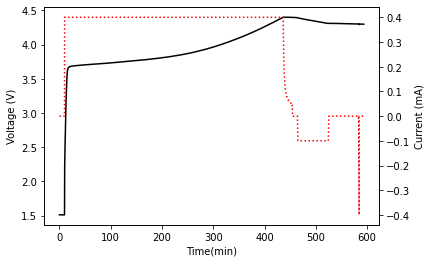

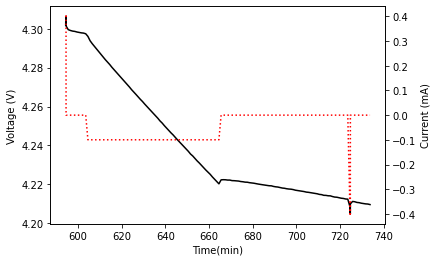

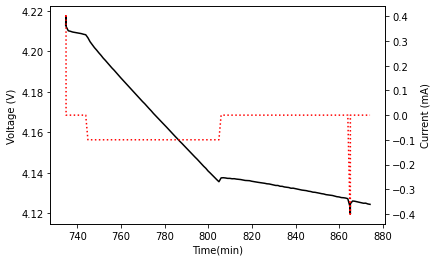

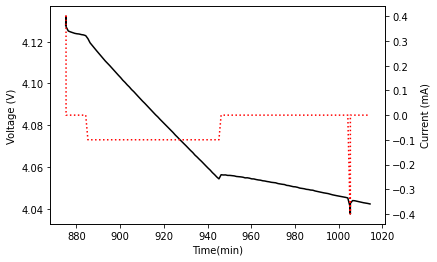

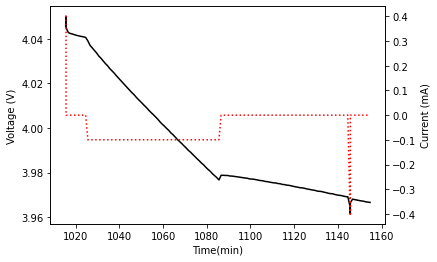

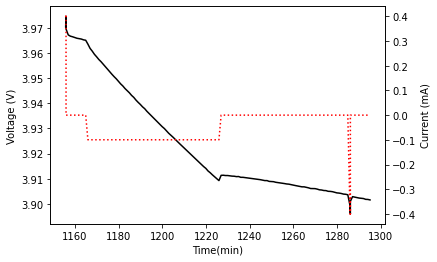

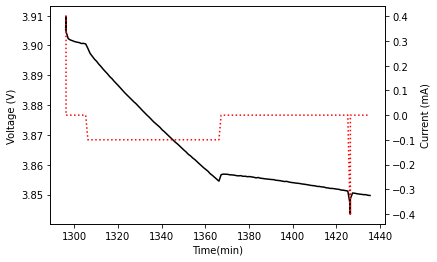

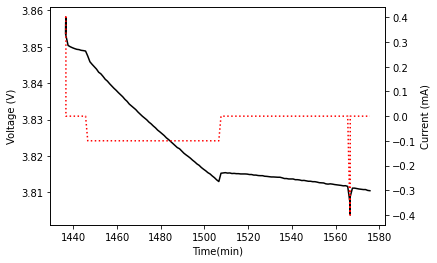

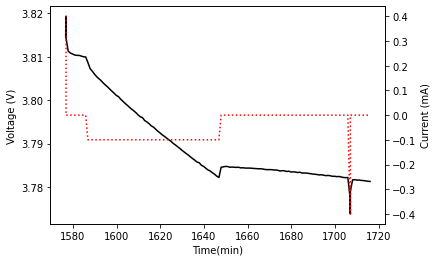

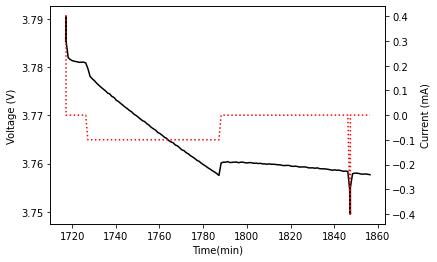

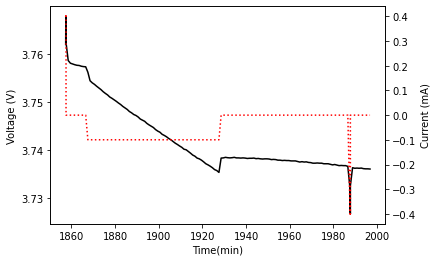

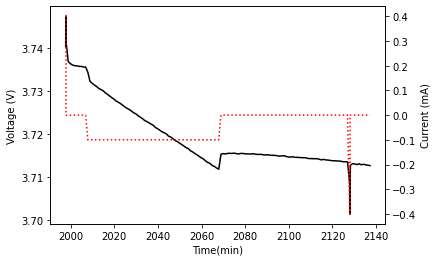

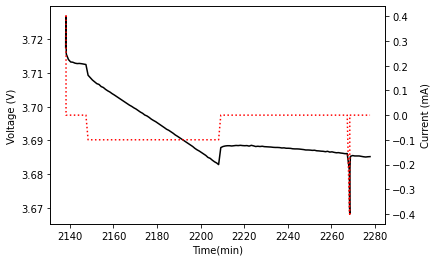

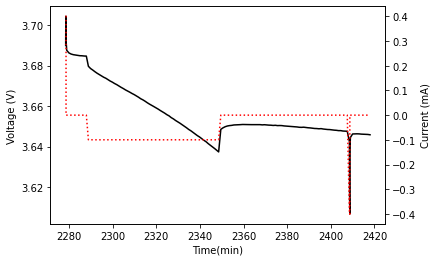

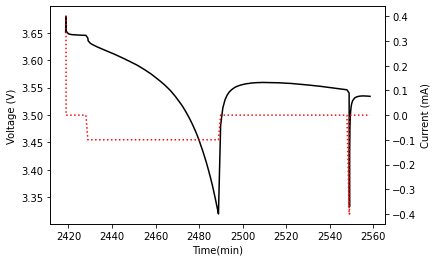

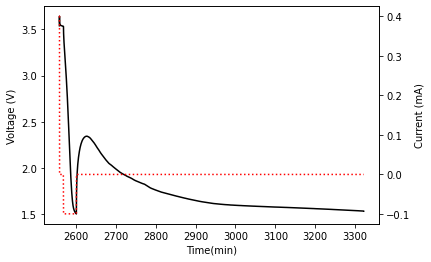

In [79]:
cycles_num=np.unique(df['cycle number'])
Time=[]
Voltage=[]
Current=[]
for f in cycles_num:
    plt.figure()
    i=np.where(df['cycle number']==f)
    plt1 =plt.subplot()
    plt2=plt1.twinx()
    Time.append(df['time/s'].iloc[i]/60)
    Voltage.append(df['Ecell/V'].iloc[i])
    Current.append(df1['I/mA'].iloc[i])
    plt1.plot(Time[0],Voltage[0], color= 'k')
    plt1.set_xlabel("Time(min)")
    plt1.set_ylabel("Voltage (V)")
    plt2.set_ylabel("Current (mA)")
    plt.title(file2)
    plt2.plot(Time[0],Current[0],color= 'r', ls=':')
    Time.clear()
    Voltage.clear()
    Current.clear()